<a href="https://colab.research.google.com/github/Yassine-Jamal/DS/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np

link = "/content/drive/MyDrive/preparation examen/tp ML/winequality-white.csv"

df = pd.read_csv(link, header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

========= A few first samples ========= 

   fixed acidity  volatile acidity  citric a

In [26]:
X = df.drop("quality", axis=1) #we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())


========= Wine Qualities ========= 

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [27]:
# bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
Y = [0 if val <=5 else 1 for val in Y]

/tmp/ipython-input-503820607.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<Axes: >

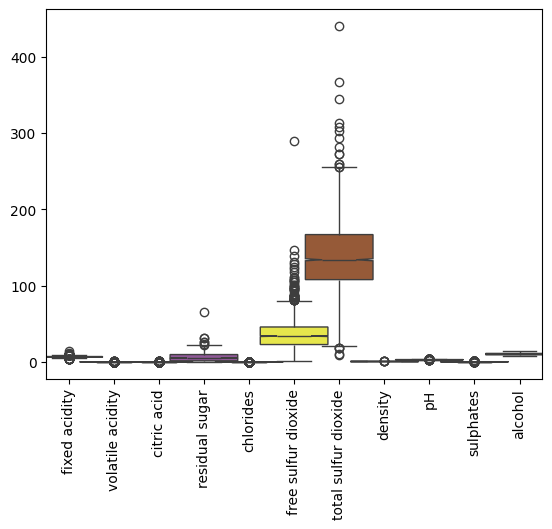

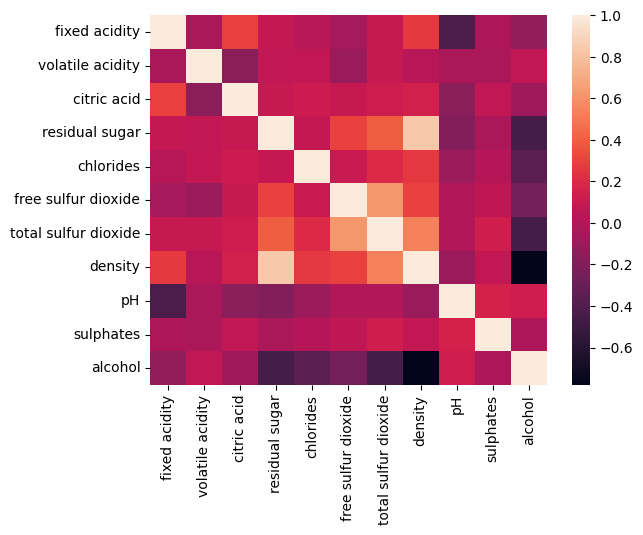

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)

2 Classification

2.1 Data split
1. Randomly split-up (X, Y ) (keep the proportion of the labels) in three subsets Da =
(Xa, Ya), Dv = (Xv, Yv) and Dt = (Xt
, Yt), respectively the training, validation and
test set.

In [30]:
from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3,
stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
stratify=Ya)


2. Discuss why do we need to keep the class proportion and shuffle the data.

2.2 k nearest neighbor (k-NN) classification

k-NN uses the samples in (Xa, ya) as the reference data. Given any sample xi
, the predicted
label is the majority label of its k ∈ N neighbors in (Xa, ya). The neighbors are the ones close to
xi
in terms of the Euclidean distance. d(xi −xj )
2 = kxi −xjk
2 = (xi −xj )
>(xi −xj ), xj ∈
Da.


In [31]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)
# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv)
# evaluate classification error rate
from sklearn.metrics import accuracy_score
error_v = 1-accuracy_score(Yv, Ypred_v)

2. Inspiring from that, train the k-nn classifier for different values of k ∈ N (in the range
[1, 40]) and evaluate its performance either on training set and validation set. Plot the
training and validation error curves as a function of k. From the plots, point out the overfitting issue.

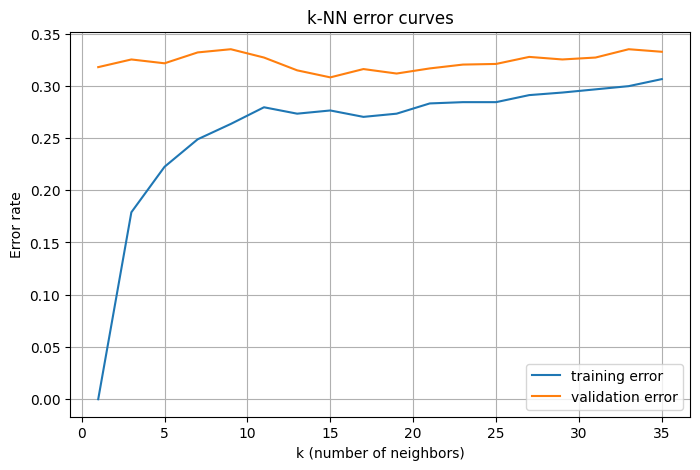

In [32]:
# some hints
k_vector = np.arange(1, 37, 2)   # define a vector of k = 1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):

    # fit with k
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    # ---------- PREDICT TRAIN SET ----------
    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)

    # ---------- PREDICT VALIDATION SET ----------
    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)


# --------- PLOT TRAIN + VALIDATION ERROR CURVES ----------
plt.figure(figsize=(8,5))
plt.plot(k_vector, error_train, label="training error")
plt.plot(k_vector, error_val, label="validation error")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Error rate")
plt.title("k-NN error curves")
plt.legend()
plt.grid(True)
plt.show()

3. How to choose the appropriate value of k ? Select the best value k
? of k based on the
validation error.


In [33]:
# some hints: get the min error and related k-value
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]


4. For the selected k
?
, what is the error rate on the data test ? Discuss the obtained results.

2.3 Normalize or not normalize the data ?
1. So far, we have used the raw inputs without any normalization. To account for different
input scales we normalize the data by removing the mean value of each feature and scale
it by dividing by the standard deviation. Comment and explain the following codes. Is the
applied normalization to the validation set sound ?

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)

2. Replicate the experiments from section 2.2 with the normalized data and compare the
achieved performances with the one of section 2.2. Drawn the conclusions ?


# Task
Run k-NN classification on the normalized training data (Xa_n) and validation data (Xv_n) using the same range of 'k' values (1 to 37, odd numbers). For each 'k', calculate and store the training and validation error rates for the normalized data.

## Run k-NN with Normalized Data

### Subtask:
Perform k-NN classification using the normalized training data (Xa_n) and validation data (Xv_n) for the same range of 'k' values. Calculate and store the training and validation error rates for each 'k'.


**Reasoning**:
Initialize empty NumPy arrays to store the training and validation error rates for the normalized data.



In [40]:
error_train_n = np.empty(k_vector.shape)
error_val_n = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):
    # fit with k
    clf_n = KNeighborsClassifier(n_neighbors=k)
    clf_n.fit(Xa_n, Ya)

    # ---------- PREDICT TRAIN SET (NORMALIZED) ----------
    Ypred_train_n = clf_n.predict(Xa_n)
    error_train_n[ind] = 1 - accuracy_score(Ya, Ypred_train_n)

    # ---------- PREDICT VALIDATION SET (NORMALIZED) ----------
    Ypred_val_n = clf_n.predict(Xv_n)
    error_val_n[ind] = 1 - accuracy_score(Yv, Ypred_val_n)

## Plot Error Curves for Normalized Data

### Subtask:
Generate a plot visualizing the training and validation error curves as a function of 'k' for the normalized data. Ensure the plot has appropriate labels and a legend.


**Reasoning**:
The subtask requires plotting the training and validation error curves for the normalized data as a function of 'k'. I will use `matplotlib.pyplot` to create the plot with appropriate labels, title, legend, and grid, following the instructions provided.



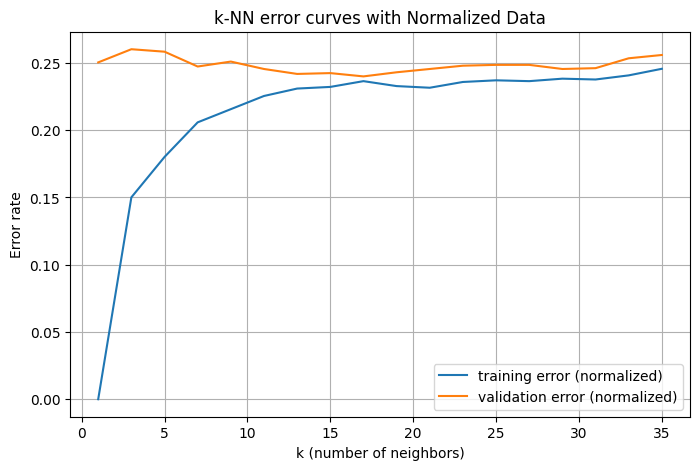

In [36]:
plt.figure(figsize=(8,5))
plt.plot(k_vector, error_train_n, label="training error (normalized)")
plt.plot(k_vector, error_val_n, label="validation error (normalized)")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Error rate")
plt.title("k-NN error curves with Normalized Data")
plt.legend()
plt.grid(True)
plt.show()


## Compare Error Curves

### Subtask:
Create a combined plot to visually compare the validation error curves from both the non-normalized and normalized data experiments. This will highlight the differences in performance. Include a clear legend and axis labels.


**Reasoning**:
To compare the validation error curves from both non-normalized and normalized data, I will create a single plot with both curves, ensuring proper labels, title, and a legend for clarity.



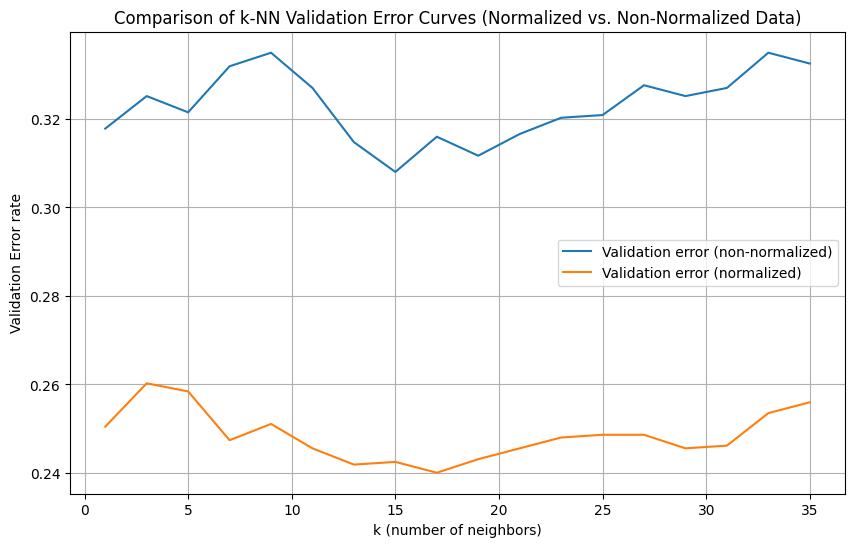

In [37]:
plt.figure(figsize=(10,6))
plt.plot(k_vector, error_val, label="Validation error (non-normalized)")
plt.plot(k_vector, error_val_n, label="Validation error (normalized)")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Validation Error rate")
plt.title("Comparison of k-NN Validation Error Curves (Normalized vs. Non-Normalized Data)")
plt.legend()
plt.grid(True)
plt.show()

## Determine Optimal k for Normalized Data

### Subtask:
Identify the 'k' value that results in the minimum validation error when using the normalized data.


**Reasoning**:
To identify the optimal 'k' value, I will find the minimum validation error in the 'error_val_n' array and then use its index to retrieve the corresponding 'k' from 'k_vector'.



In [38]:
err_min_n, ind_opt_n = error_val_n.min(), error_val_n.argmin()
k_star_n = k_vector[ind_opt_n]

print(f"Optimal k for normalized data: {k_star_n}")
print(f"Minimum validation error for normalized data: {err_min_n}")

Optimal k for normalized data: 17
Minimum validation error for normalized data: 0.24004898958971221


## Compare Performances and Discuss Conclusions

### Subtask:
Compare the best performance (error rate) achieved with normalized data against the best performance with non-normalized data. Discuss the impact of normalization on the k-NN classifier's performance for this dataset and explain the reasons behind the observed changes.


**Reasoning**:
To facilitate the comparison, I will first print the optimal 'k' value and minimum validation error for the non-normalized data, which were calculated in a previous step.



In [39]:
print(f"Optimal k for non-normalized data: {k_star}")
print(f"Minimum validation error for non-normalized data: {err_min}")

Optimal k for non-normalized data: 15
Minimum validation error for non-normalized data: 0.3080220453153705


### Comparison and Discussion of Normalization Impact

**Optimal `k` Values:**
- For non-normalized data, the optimal `k` was **15**.
- For normalized data, the optimal `k` was **17**.

**Minimum Validation Error Rates:**
- For non-normalized data, the minimum validation error was approximately **0.308**.
- For normalized data, the minimum validation error was approximately **0.240**.

**Impact of Normalization:**

a. **Effect on Minimum Validation Error:** Normalization significantly **improved** the performance of the k-NN classifier on this dataset. The minimum validation error decreased from approximately 0.308 to 0.240, which is a substantial reduction in the error rate.

b. **Change in Optimal `k` Value:** The optimal `k` value changed slightly from 15 (non-normalized) to 17 (normalized). This indicates that the optimal number of neighbors for classification shifted due to the scaled feature space.

c. **Reasons for Observed Differences:**
    - **Euclidean Distance Sensitivity:** k-NN relies on distance metrics (here, Euclidean distance) to find neighbors. When features have different scales (e.g., 'residual sugar' can be large, while 'chlorides' are small), features with larger scales can disproportionately influence the distance calculation, making the classifier biased towards them. Normalization (using `StandardScaler`) scales all features to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the distance calculation. This prevents features with larger numerical ranges from dominating the distance computation.
    - **Feature Dominance:** In the non-normalized data, features with wider ranges (like `residual sugar` or `total sulfur dioxide`) would inherently have a greater impact on the Euclidean distance between data points than features with smaller ranges (like `chlorides` or `pH`). By normalizing, all features are brought to a comparable scale, allowing the true underlying structure and relationships in the data to influence neighbor selection, rather than just the magnitude of the feature values.
    - **Improved Neighbor Selection:** With normalized data, 'neighbors' are genuinely closer in terms of their overall feature patterns, leading to more accurate classification decisions. This is why we observe a lower validation error rate for the normalized data.

## Final Task

### Subtask:
Summarize the overall findings from the comparison of k-NN performance with and without data normalization.


## Summary:

### Q&A
The overall findings from the comparison of k-NN performance with and without data normalization show that normalization significantly improves the model's performance on this dataset.

### Data Analysis Key Findings
*   For non-normalized data, the optimal `k` value for k-NN classification was found to be 15, yielding a minimum validation error of approximately 0.308.
*   For normalized data, the optimal `k` value shifted slightly to 17, and the minimum validation error significantly decreased to approximately 0.240.
*   Normalization led to a substantial reduction in the validation error rate, indicating improved classification accuracy.
*   The change in the optimal `k` value from 15 to 17 suggests that normalization altered the underlying structure of the data's feature space, leading to different optimal neighbor selections.

### Insights or Next Steps
*   Normalization is crucial for distance-based algorithms like k-NN, as it ensures that all features contribute equally to distance calculations, preventing features with larger scales from dominating the Euclidean distance metric and leading to more accurate neighbor selection.
*   Future work could explore different normalization techniques (e.g., Min-Max scaling) or other distance metrics to see if further performance improvements can be achieved.


3. How to make the trained models less sensitive to the data split ?

## K-Fold Cross-Validation to Reduce Sensitivity to Data Splits

To make our model less sensitive to a single data split, we can use K-Fold Cross-Validation. This involves splitting the data into 'k' folds, and then training the model 'k' times. Each time, a different fold is used as the validation set, and the remaining folds are used for training. The performance metrics are then averaged across all 'k' runs, providing a more reliable estimate of the model's generalization ability.

In [42]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Combine Xa and Xv, and Ya and Yv for cross-validation
X_combined = np.vstack((Xa_n, Xv_n)) # Using normalized data as it performed better
Y_combined = np.array(Ya + Yv)

# Define the number of folds
n_splits = 5 # A common choice for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store accuracy for each fold and for different k values
fold_accuracies = [] # Initialize fold_accuracies here
k_values_cv = np.arange(1, 37, 2) # Use the same k_vector as before

for k_nn in k_values_cv:
    accuracies_for_current_k = []
    for train_index, val_index in kf.split(X_combined):
        X_train_fold, X_val_fold = X_combined[train_index], X_combined[val_index]
        Y_train_fold, Y_val_fold = Y_combined[train_index], Y_combined[val_index]

        clf_cv = KNeighborsClassifier(n_neighbors=k_nn)
        clf_cv.fit(X_train_fold, Y_train_fold)
        Ypred_val_fold = clf_cv.predict(X_val_fold)
        accuracies_for_current_k.append(accuracy_score(Y_val_fold, Ypred_val_fold))

    # Store the average accuracy for the current k
    fold_accuracies.append(np.mean(accuracies_for_current_k))

# Convert to error rates
error_cv = 1 - np.array(fold_accuracies)

# Plotting the cross-validation error
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(k_values_cv, error_cv, label="Cross-Validation Error (Normalized Data)")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Average Error Rate")
plt.title("k-NN Cross-Validation Error Curve")
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal k from cross-validation
optimal_k_cv = k_values_cv[np.argmin(error_cv)]
min_error_cv = np.min(error_cv)

print(f"\nOptimal k from {n_splits}-Fold Cross-Validation: {optimal_k_cv}")
print(f"Minimum average error from {n_splits}-Fold Cross-Validation: {min_error_cv:.4f}")

NameError: name 'fold_accuracies' is not defined